In [1]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.svm import SVC

In [2]:
from sklearn.datasets import load_digits

In [3]:
digit=load_digits()
x=digit.data
y=digit.target

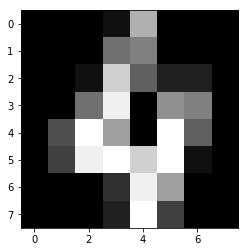

In [4]:
plt.imshow(x[4].reshape(8,8),cmap=plt.cm.gray)

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans()
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
kmeans = KMeans(n_clusters=10,max_iter=2000,random_state=1)
predict=kmeans.fit_predict(x)

In [8]:
zero = np.zeros_like(predict)

In [9]:
from scipy.stats import mode
for a in range(10):
  mask = (predict==a)
  zero[mask] = mode(y[mask])[0]

In [10]:
from sklearn import metrics
metrics.accuracy_score(zero,y)

0.7896494156928213

In [11]:
confusion_matrix(zero,y)

array([[177,   0,   1,   0,   0,   0,   1,   0,   0,   0],
       [  0,  55,   3,   0,   7,   0,   1,   4,   6,  20],
       [  0,  24, 148,   0,   0,   0,   0,   0,   3,   0],
       [  0,   1,  13, 154,   0,   1,   0,   0,   2,   6],
       [  1,   0,   0,   0, 163,   1,   0,   0,   0,   0],
       [  0,   1,   0,   2,   0, 137,   0,   5,   6,   7],
       [  0,   2,   0,   0,   0,   1, 177,   0,   2,   0],
       [  0,   0,   2,   7,   9,   0,   0, 168,   3,   8],
       [  0,  99,   8,   7,   2,   0,   2,   2, 101,   0],
       [  0,   0,   2,  13,   0,  42,   0,   0,  51, 139]])

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


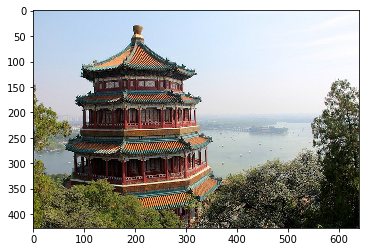

In [12]:
from sklearn.datasets import load_sample_image
china=load_sample_image('china.jpg')
plt.imshow(china)

In [17]:
china.shape

(427, 640, 3)

In [18]:
x, y, z = china.shape
china_2d = china.reshape(x*y, z)
china_2d.shape

(273280, 3)

In [19]:
kmeans_cluster = KMeans(n_clusters=7)
kmeans_cluster.fit(china_2d)
cluster_centers = kmeans_cluster.cluster_centers_

In [20]:
cluster_centers
#Seven different centroids 

array([[104.92497983,  95.94747692,  65.97792119],
       [197.56316606, 212.77851121, 228.96150787],
       [ 22.95063733,  20.10352348,  13.52731062],
       [233.69182361, 240.44367983, 249.17584209],
       [148.73055532, 133.32754342, 106.98164627],
       [176.23116634, 178.20485175, 170.45790123],
       [ 63.56279956,  56.12091503,  40.43284314]])

In [21]:
cluster_labels = kmeans_cluster.labels_

In [22]:
cluster_labels

array([1, 1, 1, ..., 6, 2, 2], dtype=int32)

In [23]:
china_2d

array([[174, 201, 231],
       [174, 201, 231],
       [174, 201, 231],
       ...,
       [ 43,  49,  39],
       [ 13,  21,   6],
       [ 15,  24,   7]], dtype=uint8)

In [24]:
np.unique(cluster_labels)

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [25]:
picture = cluster_centers[cluster_labels]

In [26]:
picture

array([[197.56316606, 212.77851121, 228.96150787],
       [197.56316606, 212.77851121, 228.96150787],
       [197.56316606, 212.77851121, 228.96150787],
       ...,
       [ 63.56279956,  56.12091503,  40.43284314],
       [ 22.95063733,  20.10352348,  13.52731062],
       [ 22.95063733,  20.10352348,  13.52731062]])

In [27]:
picture.shape

(273280, 3)

In [28]:
picture = picture.reshape(x,y,z)

In [29]:
picture.shape

(427, 640, 3)

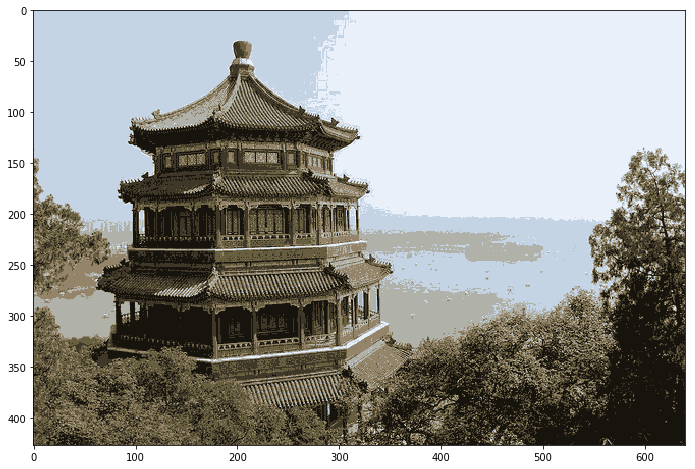

In [30]:
plt.figure(figsize = (15,8))
plt.imshow(cluster_centers[cluster_labels].reshape(x,y,z).astype(np.uint8))